In [25]:
import os
if 'maawg' not in os.getcwd():
    os.chdir("../maawg/m3_sf_2020_training")

/home/jovyan/eb/Documents/inbox science/maawg/m3_sf_2020_training


In [182]:
from dataclasses import *
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import time

In [218]:
import matplotlib.style as style
style.use('fivethirtyeight')
FIGSIZE = (13,8)

In [219]:
# Generate some random points
x = np.random.rand(100, 1)
noise = (np.random.randn(100, 1) + 0.7) * 0.5
y = 0.8 + 3 * x + noise

In [220]:
def gen_random_line():   
    y_intercept_range = (0.3, 3)
    slope_range = (-1, 6)
    
    y_intercept = random.uniform(*y_intercept_range)
    slope = random.uniform(*slope_range)
    
    if slope <= -0.5 and y_intercept <1:
        # regenerate
        y_intercept, slope = gen_random_line()
            
    return y_intercept, slope


def compare_approx(x, y, threshold):
    if abs(x - y) < threshold:
        return True
    else:
        return False
    
def gen(chosen_vars):
    if chosen_vars is None:
        return gen_random_line()
    else:
        testvals = gen_random_line()
        for i in chosen_vars:
            if compare_approx(i.y_intercept, testvals[0], 0.3):
                if compare_approx(i.slope, testvals[1], 0.6):
                    # regenerate
                    return gen(chosen_vars)
        return testvals

In [221]:
@dataclass
class Line:
    color: str
    y_intercept: float
    slope: float
    cost: float = None

In [222]:
colors = ['b','g','r','c','m','y','k']
colormap = {'b':'blue',
            'g':'green',
            'r':'red',
            'c':'cyan',
            'm':'magenta',
            'y':'yellow',
            'k':'black'
           }
inverse_colormap = {}
for i in colormap:
    inverse_colormap[colormap[i]] = i

In [223]:
def plot_points(red=False, random_lines=None, lines=None):
    
    _colors = random.sample(colors, len(colors))
    
    #compare_threshold = 0
    
    plt.figure(figsize=FIGSIZE)
    plt.scatter(x,y,s=55)
    plt.xlabel('x')
    plt.ylabel('y')
    
    if lines is not None:
        for i in lines:
            if i.color in inverse_colormap:
                color = inverse_colormap[i.color]
            else:
                color = i.color
            plt.plot(x, i.y_intercept + i.slope * x, color)

    chosen_vars = []
    if random_lines is not None:
        if random_lines > 7:
            random_lines = 7
            
        for i in range(random_lines):
            rl = gen(chosen_vars)
            randcolor = colors[i]
            chosen_vars.append(Line(colormap[randcolor], rl[0], rl[1]))
            plt.plot(x, rl[0] + rl[1] * x, randcolor)
    
    if red:
        plt.plot(x, 1.3 + 3 * x, "r")

    plt.axis((-0.03, 1.01, -0.03, 6)) #xmin, xmax, ymin, ymax
    plt.show()
    if chosen_vars:
        return chosen_vars

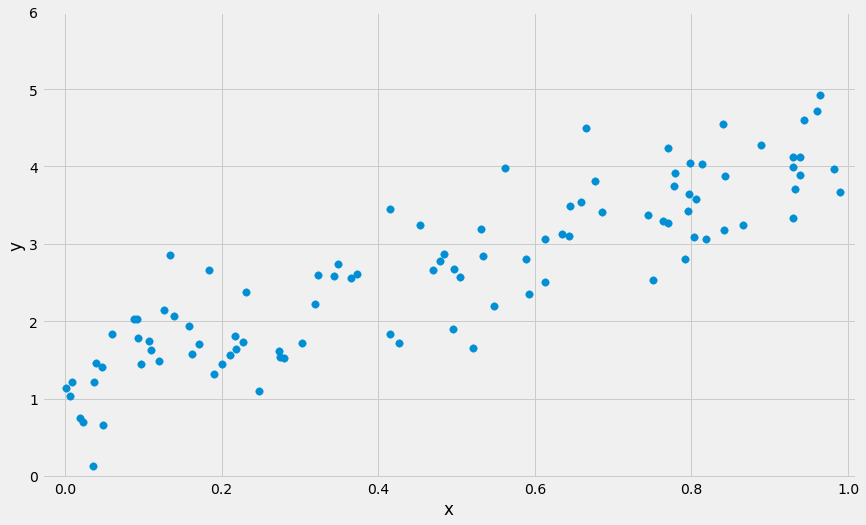

In [224]:
plot_points()

But software can't "see" the group in the same way we can. To them, it's more like this:

In [199]:
for i in range(50):
    print(x[i][0], y[i][0], sep="\t")

0.4796713882189725	2.7511015664965917
0.18766200809599876	1.7464091125523562
0.6662980307239056	3.6602016387347622
0.9070576909735242	3.0814823580920176
0.11736841875518289	1.8538755277116339
0.978212881874219	4.048158162387145
0.7586168060058592	3.7929939573052067
0.6021735776566549	3.752538502735374
0.5428115157519937	2.8608370794846407
0.703105275988509	3.092014519140745
0.9732709855313473	4.122382243760478
0.17344161210207398	1.3615070487266991
0.5698349325316633	2.144696477162084
0.2864029129684098	1.560725831512224
0.07431883984415666	0.9184448109361596
0.9136841663534006	5.508143055084533
0.7472364388088361	2.769153548596052
0.9923846361318239	4.174121668365997
0.26256505042328315	1.8356962242567127
0.9320325042342327	3.888976631061207
0.18723874829038034	1.684388724092383
0.21763910489481564	1.3451137926890324
0.24245985632935707	0.9828294815090549
0.6572014934213376	3.3672482312965153
0.3370694756703094	1.7499647838489691
0.1671777482213591	1.9502682538420215
0.230623458194219

Now, we could start generating lines at random and seeing how well they fit the data.

Which one looks best? Worst?

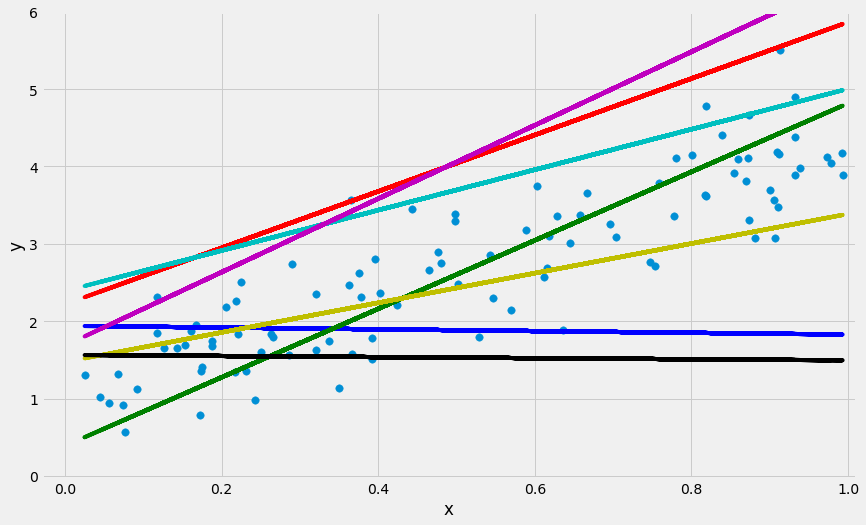

In [200]:
random_lines = plot_points(0, 8)

If we want to figure out which one is closest, we need to have a way to score each of these lines.

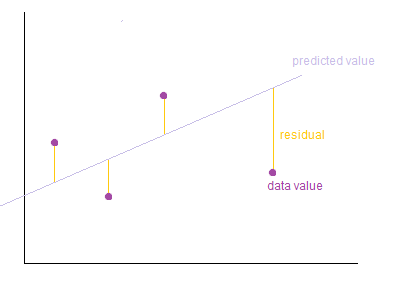

In [201]:
display(Image("img/residual.png", width=800))

In [203]:
def line_equation(yi, slope, x):
    return yi + slope * x

def score(line):
    y_predict = []
    for i in x:
        y_predict.append(line_equation(line.y_intercept, line.slope, i))
    residuals = y_predict - y

    cost = np.sum((residuals ** 2)) / (2 * x.shape[0])
    return cost

def score_lines(lines):
    for n, i in enumerate(lines):
        cost = score(i)
        lines[n].cost = cost
    scores = sorted(lines, key=lambda i: i.cost)
    
    return scores, pd.DataFrame([asdict(i) for i in scores])

In [204]:
line_scores, df = score_lines(random_lines)

df[['color','cost']]

,color,cost
0,green,0.194161
1,yellow,0.251185
2,cyan,0.681205
3,blue,0.988061
4,red,1.104651
5,magenta,1.239573
6,black,1.332904


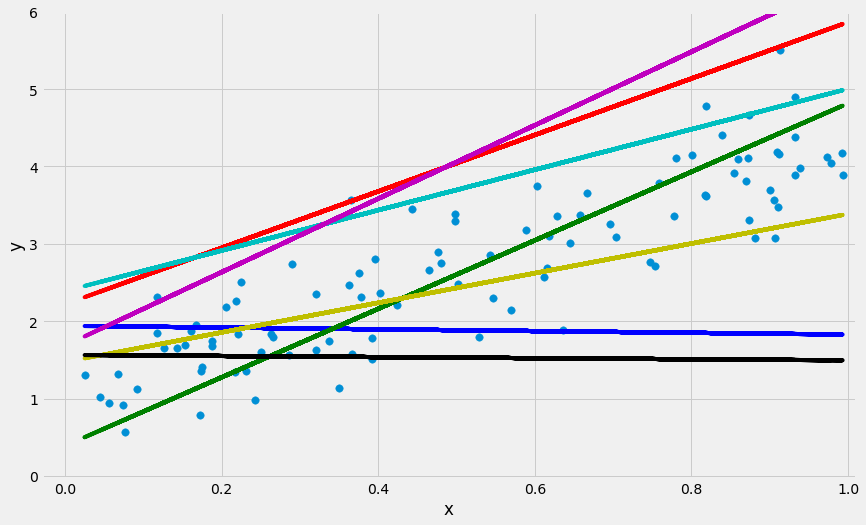

In [205]:
plot_points(lines=random_lines)

A brief digression...

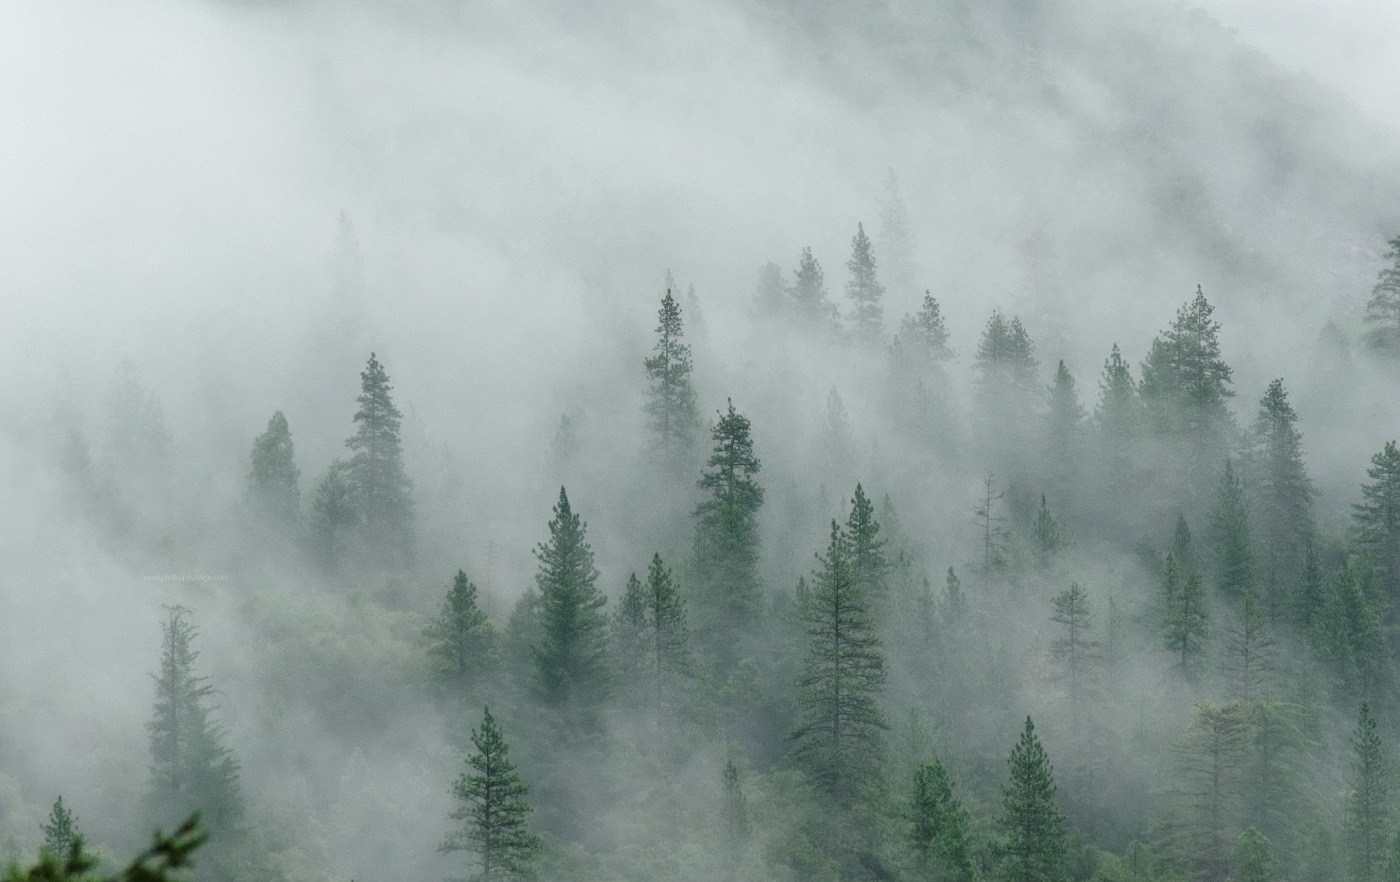

In [121]:
display(Image("img/fog.jpg"))

FANCY COMPUTER MATH GOES HERE

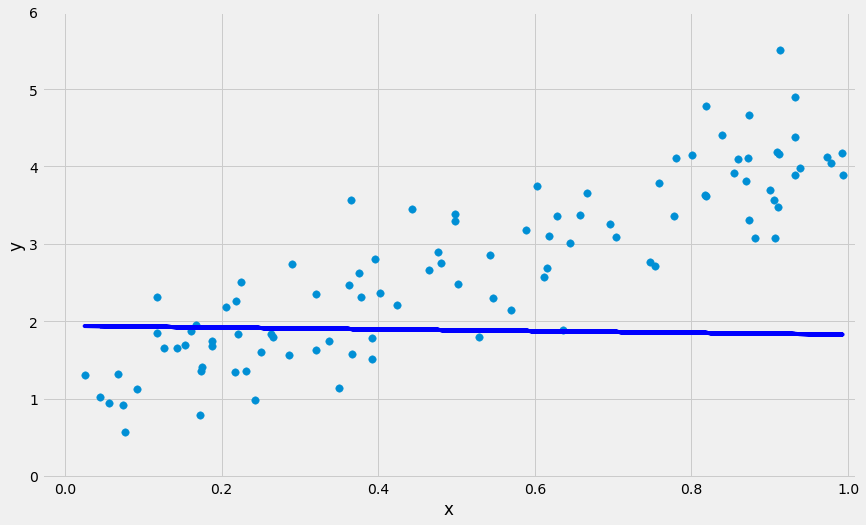

In [206]:
mediocre_fit = line_scores[3]
plot_points(lines=[mediocre_fit])

In [273]:
def show_cost(Line):
    print("cost:", round(Line.cost,2), "\n")

In [252]:
def gradient_descent(starting_line, learning_rate, epochs, 
                     new_color='cyan', 
                     sleep=None, 
                     verbose=False):
    
    yi = starting_line.y_intercept
    s = starting_line.slope
    n = int(len(x))
    
    if not starting_line.cost:
        starting_line.cost = score(starting_line)
    training_trend = [starting_line.cost]
    
    
    echo_every_x_iters = int(epochs/10)
    
    for i in range(epochs): 
        y_pred = s*x + yi  # Output of this line's function for this x value
        D_s = (-2/n) * sum(x * (y - y_pred))
        D_yi = (-2/n) * sum(y - y_pred) 
        s = s - learning_rate * D_s  # Update slope
        yi = yi - learning_rate * D_yi  # Update y-intercept
        
        iter_line = Line(color=_, y_intercept=yi, slope=s)
        iter_cost = score(iter_line)
        training_trend.append(iter_cost)
        
        if verbose:
            if i % echo_every_x_iters == 0:

                print("after", i, "epochs:", round(iter_cost,3))
                if sleep:
                    time.sleep(sleep)
    
    new_line = Line(color=new_color, y_intercept=yi, slope=s)
    new_line.cost = score(new_line)

    return new_line, training_trend

MACHINES, I HEREBY ORDER YOU TO LEARN:

In [253]:
learning_rate = 0.01  # Learning rate
epochs = 50  # The number of iterations of gradient descent to do

print("\nStarting values for this line:")
show_cost(mediocre_fit)

trained_50, cost_trend = gradient_descent(mediocre_fit, 
                           learning_rate=learning_rate,
                           epochs=epochs, 
                           new_color='cyan',
                           sleep=0.4,
                           verbose=True)

print("\nFinal values for this line:")
show_cost(trained_50)


Starting values for this line:
Y-intercept: 1.94
slope: -0.11
cost: 0.99 

after 0 epochs: 0.878
after 5 epochs: 0.79
after 10 epochs: 0.72
after 15 epochs: 0.665
after 20 epochs: 0.621
after 25 epochs: 0.585
after 30 epochs: 0.556
after 35 epochs: 0.533
after 40 epochs: 0.514
after 45 epochs: 0.498

Final values for this line:
Y-intercept: 2.34
slope: 0.36
cost: 0.49 



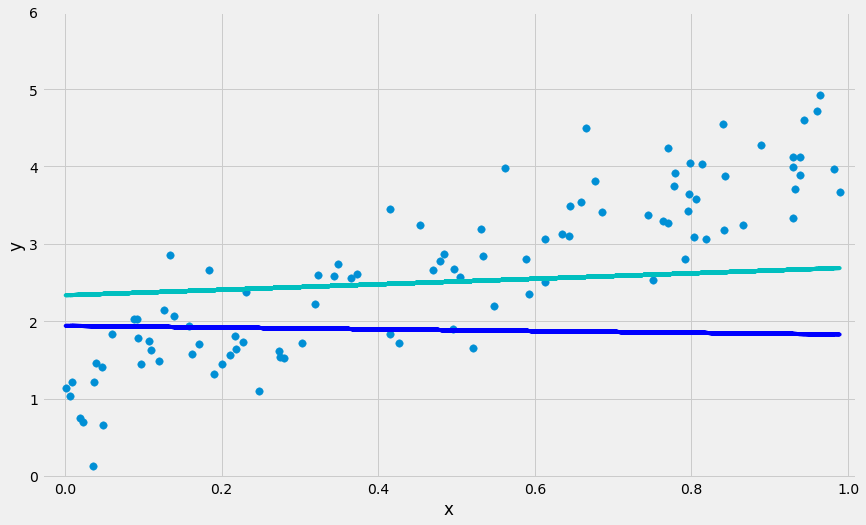

In [254]:
plot_points(lines=[mediocre_fit, trained_50])

TIME FOR MORE LEARNING

In [274]:
epochs = 500
trained_500, training_trend_500 = gradient_descent(mediocre_fit,
                               learning_rate=learning_rate,
                               epochs=epochs,
                               new_color='green')

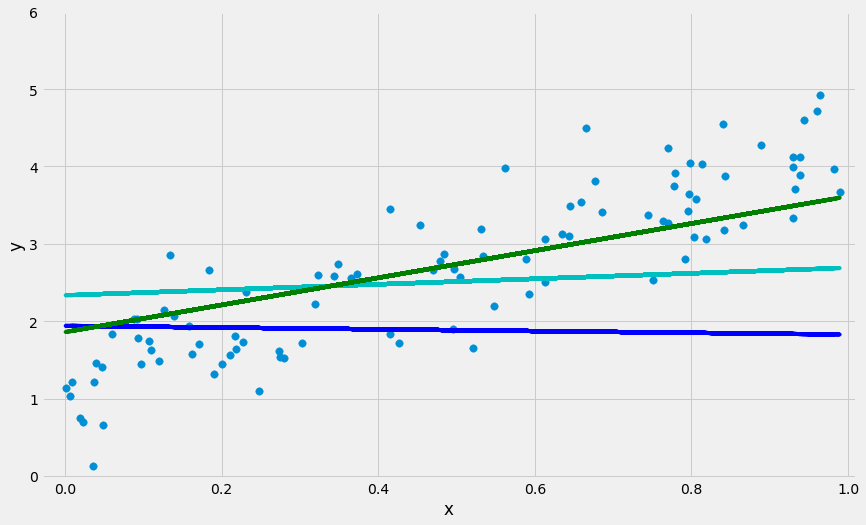

In [275]:
plot_points(lines=[mediocre_fit, trained_50, trained_500])

We can even look at how the cost changes during training:

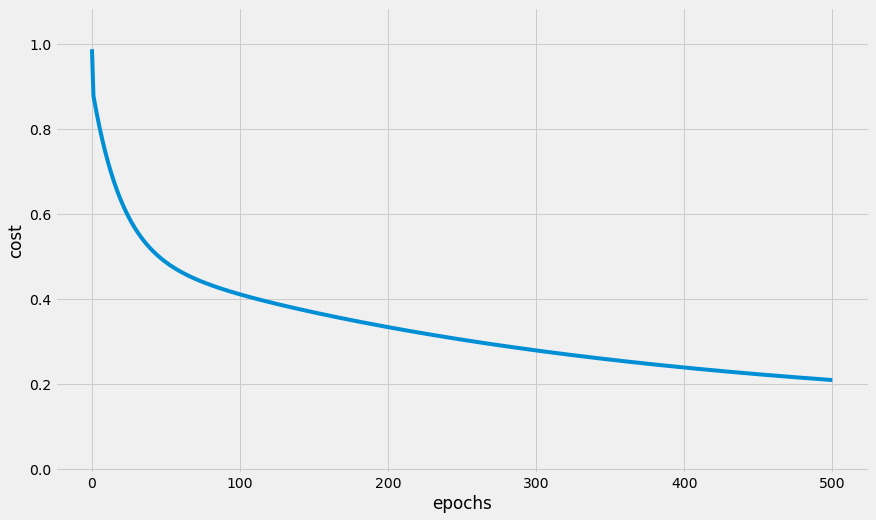

In [276]:
def plot_trend(training_trend):
    plt.figure(figsize=FIGSIZE)
    plt.xlabel('epochs')
    plt.ylabel('cost')
    plt.plot(training_trend)
    plt.axis((None, None, -0.01, max(training_trend) + 0.1)) #xmin, xmax, ymin, ymax
    plt.show()
    
plot_trend(training_trend_500)

In [268]:
epochs = 2500
trained_2500, training_trend_2500 = gradient_descent(mediocre_fit,
                               learning_rate=learning_rate,
                               epochs=epochs,
                               new_color='orange')

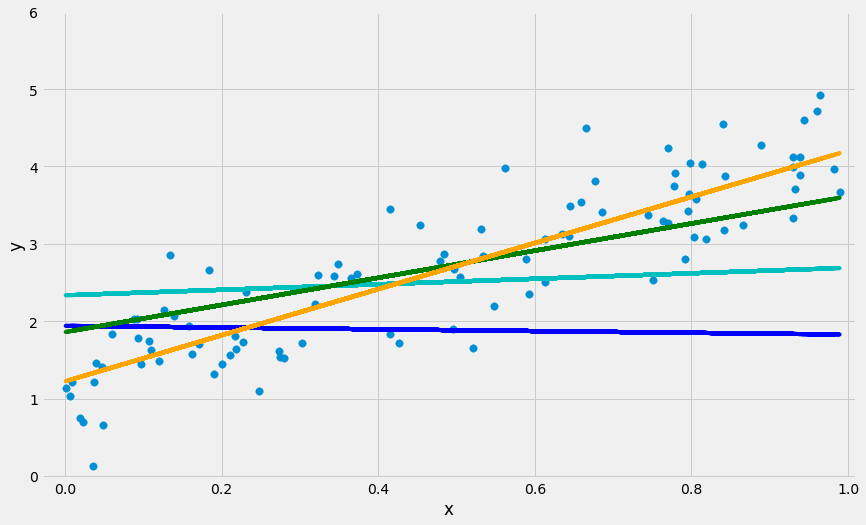

In [269]:
plot_points(lines=[mediocre_fit, trained_50, trained_500, trained_2500])

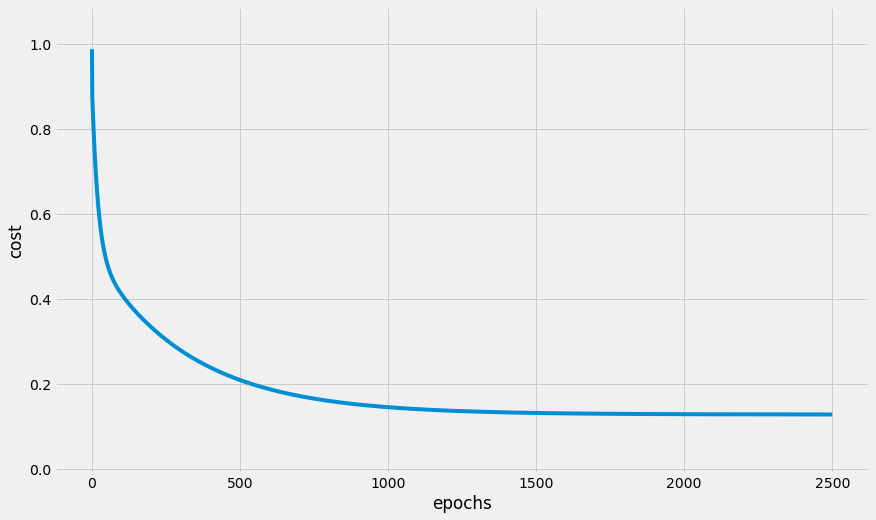

In [272]:
plot_trend(training_trend_2500)

In [ ]:
### Stretch goal: animate 
#